<a href="https://colab.research.google.com/github/arumajirou/-daily-test/blob/main/Informer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informer Demo

# **インフォーマー長鎖時系列予測のための効率的な変換器を超えて（AAAI'21 Best Paper）**


---
- これは、以下の論文にある**InformerのPytorch実装**の原点です：
- **Informer:Informer:Beyond Efficient Transformer for Long Sequence Time-SeriesForecasting(長系列時系列予測のための効率的な変換器を超えて)。**
- このレポを構築してくれたJieqi Peng@cookieminionsに感謝します。


# **プロブスパースアテンション(確率的な注意)**

---
- **自己アテンションスコア**は**ロングテール分布**を形成し、「active(活発)」クエリは「head(頭)」スコアに、「lazy(怠惰)」クエリは「tail(尻尾)」エリアに位置する。

- 我々は「怠惰な」クエリではなく「活発な」クエリを選択するようにProbSparse Attention(確率的な注意)を設計した。

- Top-uクエリを用いたProbSparse Attentionは、確率分布によってスパースな Transformerを形成します。

- なぜTop-uキーを用いないのでしょうか？

- 自己注意層の出力は、入力の再表現である。

- これはドットプロダクトペアのスコアで重み付けされた値の組合せとして定式化される。

- 完全なキーを持つトップクエリは、入力の先頭成分の完全な再表現を促し、全てのドットプロダクトペアの中から「先頭」のスコアを選択することと等価である。

- Top-uキーを選択した場合、フルキーは「ロングテール」スコア内の些細な値の合計を保持するだけで、主要成分の再表現は破棄される

ChatGPT
- Tell me ProbSparse Attention in plain

---
- 確率的スパース注意（ProbSparse）は、機械翻訳、テキスト要約、言語モデリングなどの自然言語処理（NLP）タスクで使用される注意メカニズムの一種である。

- 注意メカニズムは、入力の処理において、入力全体を一度に考慮するのではなく、入力の特定の部分に焦点を当てることを可能にする。

- これは、長いデータ列を処理する際に、各ステップで最も関連性の高い情報に焦点を当てることができるため、有用である。

- ProbSparse Attention は注意メカニズムの変形で、注意の重みをすべて計算するのではなく、分布から少数の注意をサンプリングすることによって確率的要素を導入しています。

- これは、すべての注意ではなく少数の注意の重みを計算する必要があるため、モデルをより効率的にするのに役立ちます。

- ProbSparse Attentionでは、注意の重みは確率的注意のメカニズムを使用して計算され、これにより、モデルはすべての注意を計算するのではなく、分布から少数の注意の重みをサンプリングすることができます。

- 分布は通常スパースに選択され、ほとんどの注意の重みがゼロに近く、ゼロでない重みが少数であることを意味する。

- これにより、モデルは入力の少数の関連する部分に焦点を当て、残りを無視することができる。

- ProbSparse Attentionは多くのNLPタスクで有効であることが示されており、これを使用するモデルの性能向上に役立ちます。

---
ChatGPT
- 'ProbSparse Attention' in a simple way with examples.
 - 'ProbSparse Attention'を例を交えてわかりやすく教えてください。

---
- 確率的スパース注意（ProbSparse Attention）は、ニューラルネットワークで使われる注意メカニズムの一種である。

- 注意メカニズムは、入力データを処理する際に、入力全体を均等に扱うのではなく、入力データの特定の部分にモデルの注意を集中させるために使用されます。

- これは長いデータ列を処理する際に有用で、モデルは膨大なデータ量に圧倒されることなく、入力の最も関連性の高い部分に注目するように学習することができる。

- ProbSparse Attention は注意メカニズムの変形で、疎な注意パターンを使用することによって注意の計算複雑性を減らすことを目的としています。

- 従来の注意メカニズムでは、モデルは注意の重みを計算する際に入力シーケンスのすべての要素を考慮するが、これは長いシーケンスでは計算量が多くなることがある。

- ProbSparse Attentionでは、代わりに入力要素の小さなサブセットのみを考慮し、計算時間を短縮し、注意メカニズムをより効率的にします。

- 以下にニューラルネットワークでProbSparse Attentionがどのように使用されるかの例を示します。

 - 文中の一連の単語を処理し、その中の次の単語を予測しようとするニューラルネットワークがあるとする。

 - モデルへの入力は単語の埋め込みの列であり、それはその列の各単語を表す密なベクトルである。

 - このモデルはまず入力を一連の隠れ層に通し、隠れ状態のセットを生成し、それを使って注目の重みを計算する。

 - ProbSparse Attention では、モデルは注意の重みを計算するとき、隠れた状態の小さな部分集合だけを考慮する。

 - 例えば、モデルはいくつかの隠された状態をランダムにサンプリングし、注意の重みを計算するためにそれらだけを使用することができます。

 - これは、モデルが注意の重みを計算するときにすべての隠された状態を考慮する必要がないため、計算時間が短縮されます。

 - 注意の重みが計算されると、モデルはそれを使ってシーケンス中の次の単語を予測する際に最も関連性の高い隠れた状態に注目することができる。

 - 例えば、モデルが「cat」という単語を予測しようとしている場合、「feline」や「meow」といった単語に対応する隠れ状態をより注目させるかもしれない。

 - ProbSparse Attentionの基本的な理解の一助となれば幸いです。他に質問があれば教えてください。





ChatGPT
- Informer:Informer:Beyond Efficient Transformer for Long Sequence Time-SeriesForecasting paper taught in detail and with examples for easy understanding
- 「Informer:長系列時系列予測のための効率的な変換器を超えて」の論文を詳しく、例題を交えて分かりやすく説明。


---


Beyond Efficient Transformer for Long Sequence Time-Series Forecasting" 論文は、トランスフォーマーに基づくニューラルネットワークを用いて、**長い時系列を予測する新しい方法**を提示している。

著者らは、この課題に対するトランスフォーマーモデルの効率と効果を向上させるために、**ハイブリッドアテンション、時間エンコーディング**、**動的マスキング**の利用など、いくつかの手法を提案している。

一般に、トランスフォーマーモデルは、**言語翻訳や時系列予測など**、シーケンスからシーケンスへのタスクに特に適したニューラルネットワークの一種である。

トランスフォーマーモデルは、従来のリカレントニューラルネットワーク（RNN）のように逐次的に処理するのではなく、**自己注視メカニズム**を用いて入力配列を並列的に処理する。

このため、**より効率的で並列化が容易**ですが、**自己注視の2次的な複雑さ**のため、**長いシーケンスを処理**するのに**苦労**することがあります。

この問題に対処するため、「Beyond Efficient Transformer」論文の著者らは、**自己注意**と**局所注意**を**組み合わせ**た**ハイブリッド注意メカニズム**の使用を提案している。

この**ハイブリッド注意**は、**入力シーケンスの限られたウィンドウのみを考慮**する。

これにより、モデルは**入力の重要な部分に焦点を当てながら、長いシーケンスを効率的に処理することができる**ようになる。

また、RNNのような**リカレント構造**ではなく、**入力シーケンスの時間次元を表現するための時間エンコーディング**を使用することを提案している。

これにより、**変換器の効率を維持**したまま、**データ中の長期的な依存関係をよりよく捉えることができる**ようになる。

最後に、著者らは、学習中にモデルが将来の時間ステップに注目するのを防ぐために、**動的マスキング**を使用することを提案している。

これにより、モデルは**将来の情報に頼るのではなく、現在の時間ステップの予測に集中すること**ができる。

全体として、「Beyond Efficient Transformer」論文は、**長期時系列予測のための変換モデルの効率と有効性を改善**するための多くのテクニックを提示している。

**ChatGPT**
- A clear summary and comparison of the time series forecasting model 'Informer' with other time series forecasting models with examples
- 時系列予測モデルの’Informer’と他の時系列予測モデルの比較を例を交えながらわかりやすく要約して

---
- **Informer**は、セールスフォースが開発した時系列予測モデルです。

- ディープラーニングの手法を用いた機械学習モデルで、**時系列の将来の値について予測**を行う。

- Informerの大きな特徴は、**大量のデータ**を扱い、**1分ごとや1時間ごと**といった**高頻度で予測**を行うことができる点です。

- このため、**金融、通信、製造業など、高頻度にデータを収集する業界のアプリケーション**に適しています。

- Informerは、**欠損データの処理**や**多変量時系列**の処理もできるように設計されており、**関連する複数の時系列に基づく予測を同時に行うこと**ができる。

- 比較のために使用できる他の時系列予測モデルには、以下のようなものがあります。

- **自己回帰統合移動平均（ARIMA）**
 - これは**古典的な時系列予測モデル**で、**過去の値とその差の組み合わせ**を使って、**将来の値を予測**します。

 - 時系列の統計的性質が**時間とともに変化しない定常時系列**に適している。

- **指数平滑化：**
 - 単純な時系列予測モデルで、**過去の値の加重平均**を使用して将来の値を予測します。

 - **トレンド**や**季節的なパターン**を示す**データの予測**によく利用される。

- **LSTM（長期短期記憶）**
 - リカレントニューラルネットワーク（RNN）の一種で、**株価や気象データなど、長期的な依存性を持つ時系列の予測**に適している。

 - LSTMは、**長期間の情報を学習・保持すること**ができ、**欠損データや複数の入力特徴量**を扱うことができる。

- 時系列予測にこれらのモデルを使用する例としては、
 - 小売店の**売上データを予測**するために**ARIMA**を使用する、
 - **季節的なパターン**を持つ製品の**需要を予測**するために**指数平滑化**を使用する、
 - **株価を予測する**ために**LSTM**を使用する、などが考えられます。


ChatGPT
- Give me some SOTA models with time series forecasting models.
- 時系列予測モデルでSOTAのモデルをいくつか教えて

---

- 時系列予測のための最新鋭の（SOTA）モデルは数多くあり、与えられた課題に最も適したものは、**時系列データの特定の特性と予測要件に依存する**ことになります。

- 時系列予測のための一般的なSOTAモデルには以下のようなものがあります。

- **長短期記憶（LSTMネットワーク)**
 - これはリカレントニューラルネットワーク（RNN）の一種で、**データの長期的な依存関係**を捉えることができるため、時系列データのモデリングによく適しています。

- **トランスフォーマー**
 - 深層学習モデルの一種で、**自然言語処理タスクで人気**を博しているが、**時系列予測**にも適用されている。

 - **データを並列に処理できる**ため、**大量のデータを扱う場合**に特に有効。

- **自己回帰統合移動平均(ARIMA)モデル**

 - 時系列予測に広く使用されている統計モデルの一種です。

 - 時系列を、**時系列の遅れ値間の依存性を捉える自己回帰成分**と、**モデルの残差（誤差）をモデル化する移動平均成分**の組み合わせとしてモデル化するという考えに基づいている。

- **季節分解**

 - 時系列を**トレンド**、**季節性**、**残差**などの構成要素に**分解する**方法である。

 - データの**パターンを特定**し、より正確な予測モデルを構築するのに有効である。

- **プロフェット** 
 - Facebookが開発した時系列予測用のオープンソースソフトウェアライブラリです。
 - **使いやすく設計**されており、**トレンド、季節性、休日を含む様々な時系列データ**を扱うことができます。

- 注目すべきは、モデルの選択は、**目前の具体的な予測タスクにも依存する**ということです。

- 例えば、データに**強い季節性がある**場合、この季節性を捉えることができるモデルの方が、そうでないモデルよりも効果的な場合があります。

- 同様に、データが**長期的なトレンドや非線形パターン**を示す場合、LSTMネットワークやトランスフォーマーなどの**より複雑なモデル**がより適しているかもしれません。



ChatGPT
- Tell me more about the transformer model with examples.
- トランスフォーマーモデルについて例を交えながら詳しく教えて

---

Transformerは、2017年にVaswaniらによる論文「Attention is All You Need」で紹介されたニューラルネットワークアーキテクチャの一種です。

主に、機械翻訳、言語モデリング、テキスト分類などの自然言語処理タスクに利用されています。

Transformerの主な特徴の1つは、モデルが入力を処理する際に異なる入力トークン（例えば、文中の単語やサブワード）の重要性を重み付けすることを可能にする自己注意メカニズムを使用することである。

これは、RNN（Recurrent Neural Network）のような従来のモデルが、入力を一度に1つのトークンずつ順次処理するのとは対照的である。

トランスフォーマーモデルは、エンコーダー層とデコーダー層の積み重ねで構成されている。

エンコーダー層は、入力のシーケンスを取り込み、それを「コンテキストベクター」と呼ばれる連続的な表現のセットに変換する。

デコーダ層は、この文脈ベクトルと自己注意メカニズムを用いて、出力シーケンスを生成する。

以下は、Transformerモデルがどのように機械翻訳に使用されるかの簡単な例である。

入力。入力： "猫がマットの上に座った." (英語)

出力。"Le chat était assis sur le tapis." (フランス語) (フランス語)

入力シーケンスはエンコーダ層に渡され、エンコーダ層は一連の文脈ベクトルを生成する。

デコーダ層は、この文脈ベクトルと自己アテンション機構を用いて、出力シーケンス "Le chat était assis sur le tapis "を生成する。

Transformerモデルには多くのバリエーションと修正が文献で提案されており、多くの自然言語処理タスクで非常に人気のある選択肢となっている。

ChatGPT
- Summarize the main points about u-net architecture in a clear and concise manner, using examples and comparisons with others.
- u-net architectureについて他の者との比較を例でたとえながら、わかりやすく、簡潔に要点をまとめて

---
- U-Netは、医療画像のセグメンテーションのために開発された**畳み込みニューラルネットワークのアーキテクチャ**である。

- 画像内の**特徴を局所化**し、**正確に分類することができる**ことで知られている。

- **縮小パス（ダウンサンプリング**）と**拡大パス（アップサンプリング）**を持ち、**U字型の構造**をしていることから**U-Net**と呼ばれている。

- **収縮経路は、特徴マップの空間解像度を下げる一連の畳み込み層と最大プーリング層**からなり、**拡大経路は、空間解像度を上げる一連の畳み込み層とアップコンボリューション層からなる。**

- U-Netには**スキップ接続**もあり、これによってモデルは**ダウンサンプリング層**をバイパスし、**縮小パスからの特徴マップ**を**拡大パスのアップサンプリング層と連結**させることができる。

- これにより、モデルは**空間情報を保持し**、**セグメンテーションの精度を向上させることができる**。

- U-Netアーキテクチャの主な利点の1つは、**比較的シンプルで効率的**でありながら、**様々な画像セグメンテーションタスクで良好な性能を発揮する**ことである。

- U-Netは医療用画像処理に広く用いられているほか、衛星画像解析や細胞追跡など、他の領域にも応用されている。

- 他の画像セグメンテーションモデルと比較して、**U-Netは画像内の特徴を正確に位置付け、分類する能力と**、**不均衡なデータセットを処理する能力**で知られています。

- しかし、計算量が多いため、**非常に高い解像度**や**非常に大きな画像**を必要とするタスクにはあまり適さないかもしれません。



- Summarize the main points in an easy-to-understand way, using a metaphor for the difference between what up-sampling and down-sampling in deep learning do.
- 深層学習のアップサンプリングとダウンサンプリングが何をしているか違いをたとえながら、分かりやすく要点をまとめて

---

- **アップサンプリング・ダウンサンプリング**は、深層学習において**データの解像度を調整するために用いられる技術**である。

- **写真のズームイン・ズームアウト**と同じように考えることができる。

- **アップサンプリング**は、**ピクセルやデータポイントを追加することでデータの解像度を上げる**。

 - これは、**写真を拡大**すると**細部まで見える**が、**画像がぼやける**ことがあるのと同じです。

 - **アップサンプリング**は、**小さな画像のサイズを大きくしたり**、**欠落したデータを補間する**ために使用されます。

- **ダウンサンプリング**は、**ピクセルやデータポイントを削除することで、データの解像度を下げます。**

 - これは写真の**ズームアウト**のようなもので、**より広い範囲を見ることができます**が、**画像はより詳細ではなくなります。**

 - **ダウンサンプリング**は、**大きな画像のサイズを小さく**したり、**処理するデータ量を減らしたり**するために使用されます。

- アップサンプリングとダウンサンプリングの両方が、ディープラーニングの有用な技術であり、目下のタスクの特定のニーズに応じて使用される。

## Download code and dataset

In [1]:
!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/zhouhaoyi/ETDataset.git
!ls

Cloning into 'Informer2020'...
remote: Enumerating objects: 573, done.
remote: Total 573 (delta 0), reused 0 (delta 0), pack-reused 573
Receiving objects: 100% (573/573), 6.48 MiB | 20.80 MiB/s, done.
Resolving deltas: 100% (328/328), done.
Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 187 (delta 25), reused 20 (delta 20), pack-reused 159
Receiving objects: 100% (187/187), 3.86 MiB | 18.45 MiB/s, done.
Resolving deltas: 100% (62/62), done.
ETDataset  Informer2020  sample_data


In [2]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

In [3]:
# !pip install -r ./Informer2020/requirements.txt

## Experiments: Train and Test

In [4]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [5]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'ETTh1' # data
args.root_path = './ETDataset/ETT-small/' # root path of data file
args.data_path = 'ETTh1.csv' # data file
args.features = 'M' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'OT' # target feature in S or MS task
args.freq = 'h' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 96 # input sequence length of Informer encoder
args.label_len = 48 # start token length of Informer decoder
args.pred_len = 24 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 7 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'h'

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 6
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'


In [6]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [7]:
# Set augments by using data name
data_parser = {
    'ETTh1':{'data':'ETTh1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
    'ETTh2':{'data':'ETTh2.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
    'ETTm1':{'data':'ETTm1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
    'ETTm2':{'data':'ETTm2.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
}
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [8]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [9]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'ETTh1', 'root_path': './ETDataset/ETT-small/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 'h'}


In [10]:
Exp = Exp_Informer

In [11]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 8521
val 2857
test 2857
	iters: 100, epoch: 1 | loss: 0.4236474
	speed: 0.1403s/iter; left time: 210.0682s
	iters: 200, epoch: 1 | loss: 0.3332216
	speed: 0.0717s/iter; left time: 100.2335s
Epoch: 1 cost time: 26.020199298858643
Epoch: 1, Steps: 266 | Train Loss: 0.4131755 Vali Loss: 0.6555443 Test Loss: 0.6183037
Validation loss decreased (inf --> 0.655544).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.2832091
	speed: 0.1771s/iter; left time: 218.0128s
	iters: 200, epoch: 2 | loss: 0.2256787
	speed: 0.0732s/iter; left time: 82.7471s
Epoch: 2 cost time: 19.44959282875061
Epoch: 2, Steps: 266 | Train Loss: 0.2575033 Vali Loss: 0.6790736 Test Loss: 0.6235172
EarlyStopping counter: 1 out of 3
Updating learning rate to 5e-05
	iters: 100, epoch: 3 | loss: 0.1782649
	speed: 0.1705s/iter;

## Prediction

In [12]:
import os

# set saved model path
setting = 'informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
# path = os.path.join(args.checkpoints,setting,'checkpoint.pth')

In [13]:
# If you already have a trained model, you can set the arguments and model path, then initialize a Experiment and use it to predict
# Prediction is a sequence which is adjacent to the last date of the data, and does not exist in the data
# If you want to get more information about prediction, you can refer to code `exp/exp_informer.py function predict()` and `data/data_loader.py class Dataset_Pred`

exp = Exp(args)

exp.predict(setting, True)

Use GPU: cuda:0
pred 1


In [14]:
# the prediction will be saved in ./results/{setting}/real_prediction.npy
import numpy as np

prediction = np.load('./results/'+setting+'/real_prediction.npy')

prediction.shape

(1, 24, 7)

### More details about Prediction - prediction function

In [15]:
# here is the detailed code of function predict

def predict(exp, setting, load=False):
    pred_data, pred_loader = exp._get_data(flag='pred')
        
    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path+'/'+'checkpoint.pth'
        exp.model.load_state_dict(torch.load(best_model_path))

    exp.model.eval()
        
    preds = []
        
    for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(pred_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        # decoder input
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)
        # encoder - decoder
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device)
        
        pred = outputs.detach().cpu().numpy()#.squeeze()
        
        preds.append(pred)

    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
    
    # result save
    folder_path = './results/' + setting +'/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    np.save(folder_path+'real_prediction.npy', preds)
    
    return preds


In [16]:
# you can also use this prediction function to get result
prediction = predict(exp, setting, True)

pred 1


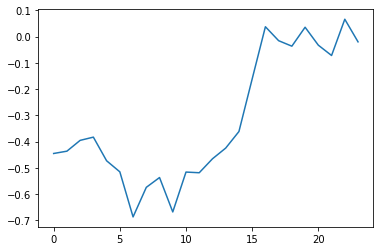

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()

### More details about Prediction - prediction dataset

You can give a `root_path` and `data_path` of the data you want to forecast, and set `seq_len`, `label_len`, `pred_len` and other arguments as other Dataset. The difference is that you can set a more detailed freq such as `15min` or `3h` to generate the timestamp of prediction series.

`Dataset_Pred` only has one sample (including `encoder_input: [1, seq_len, dim]`, `decoder_token: [1, label_len, dim]`, `encoder_input_timestamp: [1, seq_len, date_dim]`, `decoder_input_timstamp: [1, label_len+pred_len, date_dim]`). It will intercept the last sequence of the given data (seq_len data) to forecast the unseen future sequence (pred_len data).

In [18]:
from data.data_loader import Dataset_Pred
from torch.utils.data import DataLoader

In [19]:
Data = Dataset_Pred
timeenc = 0 if args.embed!='timeF' else 1
flag = 'pred'; shuffle_flag = False; drop_last = False; batch_size = 1

freq = args.detail_freq

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    timeenc=timeenc,
    freq=freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [20]:
len(data_set), len(data_loader)

(1, 1)

## Visualization

In [21]:
# When we finished exp.train(setting) and exp.test(setting), we will get a trained model and the results of test experiment
# The results of test experiment will be saved in ./results/{setting}/pred.npy (prediction of test dataset) and ./results/{setting}/true.npy (groundtruth of test dataset)

preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

# [samples, pred_len, dimensions]
preds.shape, trues.shape

((2848, 24, 7), (2848, 24, 7))

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

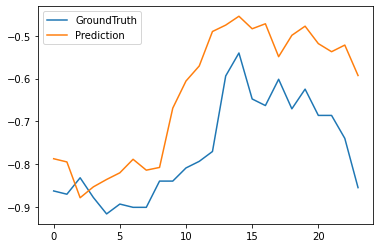

In [23]:
# draw OT prediction
plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()

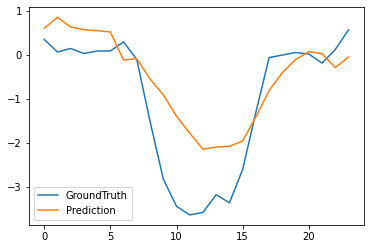

In [24]:
# draw HUFL prediction
plt.figure()
plt.plot(trues[0,:,0], label='GroundTruth')
plt.plot(preds[0,:,0], label='Prediction')
plt.legend()
plt.show()

In [25]:
from data.data_loader import Dataset_ETT_hour
from torch.utils.data import DataLoader

Data = Dataset_ETT_hour
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    freq=args.freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [26]:
import os

args.output_attention = True

exp = Exp(args)

model = exp.model

setting = 'informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
path = os.path.join(args.checkpoints,setting,'checkpoint.pth')
model.load_state_dict(torch.load(path))

Use GPU: cuda:0


<All keys matched successfully>

In [27]:
# attention visualization
idx = 0
for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(data_loader):
    if i!=idx:
        continue
    batch_x = batch_x.float().to(exp.device)
    batch_y = batch_y.float()

    batch_x_mark = batch_x_mark.float().to(exp.device)
    batch_y_mark = batch_y_mark.float().to(exp.device)
    
    dec_inp = torch.zeros_like(batch_y[:,-args.pred_len:,:]).float()
    dec_inp = torch.cat([batch_y[:,:args.label_len,:], dec_inp], dim=1).float().to(exp.device)
    
    outputs,attn = model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

In [28]:
attn[0].shape, attn[1].shape #, attn[2].shape

(torch.Size([1, 8, 96, 96]), torch.Size([1, 8, 48, 48]))

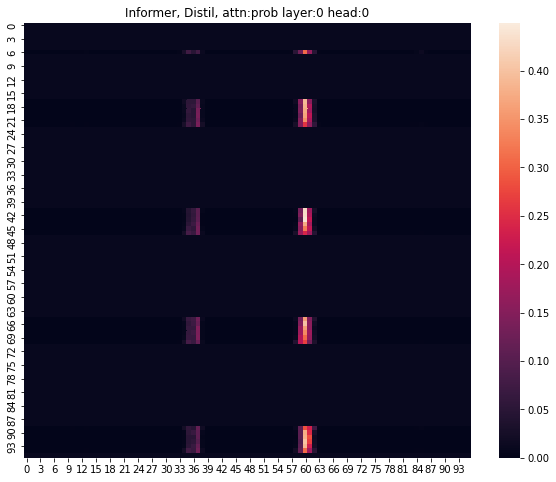

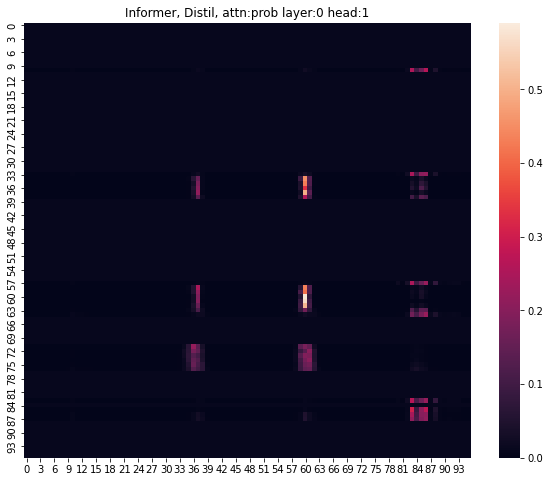

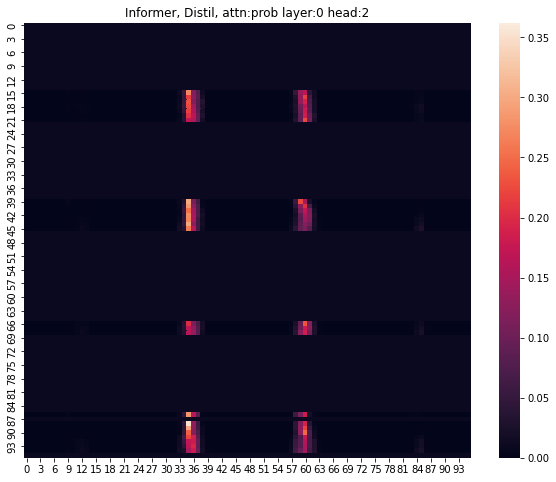

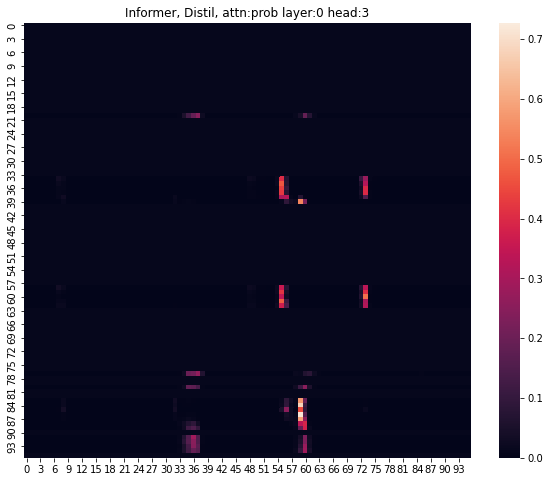

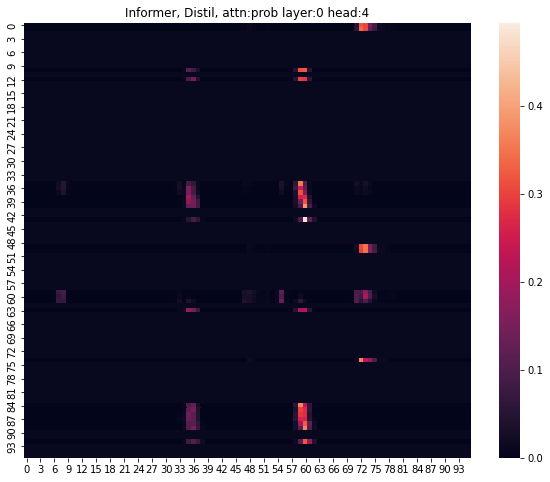

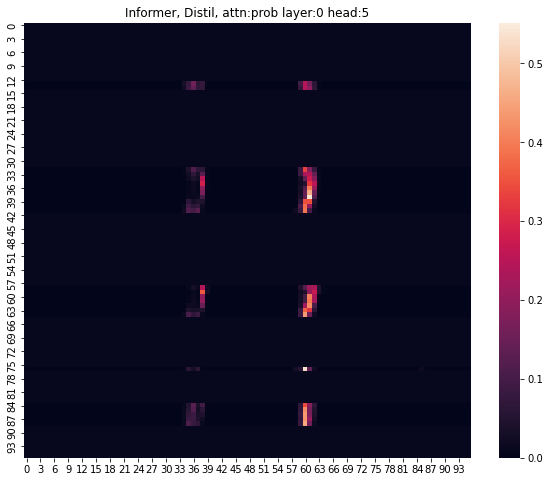

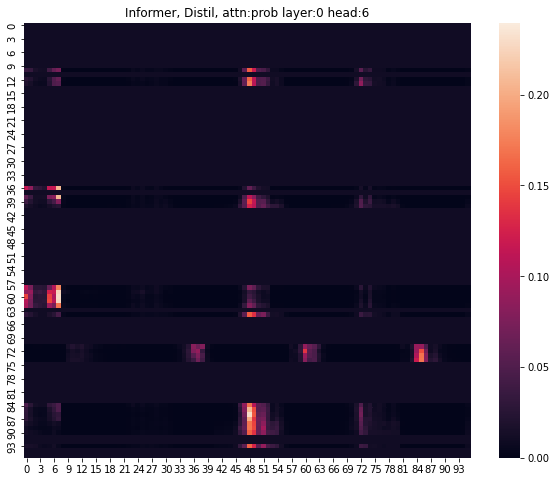

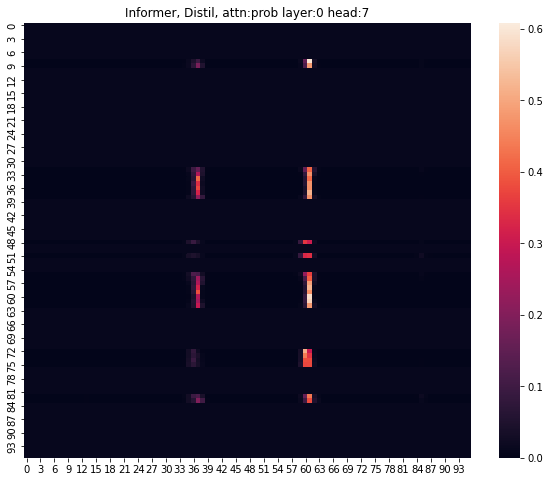

In [29]:
layer = 0
distil = 'Distil' if args.distil else 'NoDistil'
for h in range(0,8):
    plt.figure(figsize=[10,8])
    plt.title('Informer, {}, attn:{} layer:{} head:{}'.format(distil, args.attn, layer, h))
    A = attn[layer][0,h].detach().cpu().numpy()
    ax = sns.heatmap(A, vmin=0, vmax=A.max()+0.01)
    plt.show()

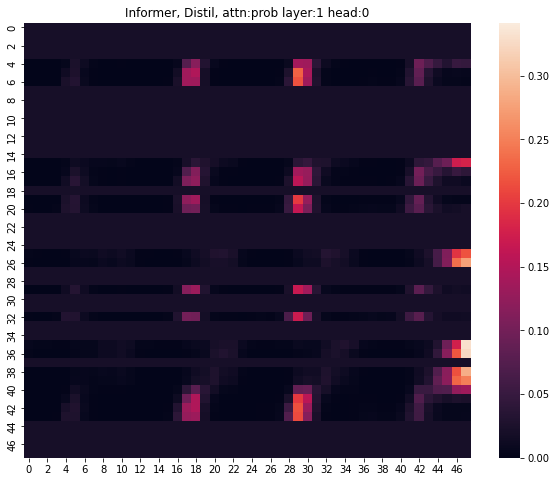

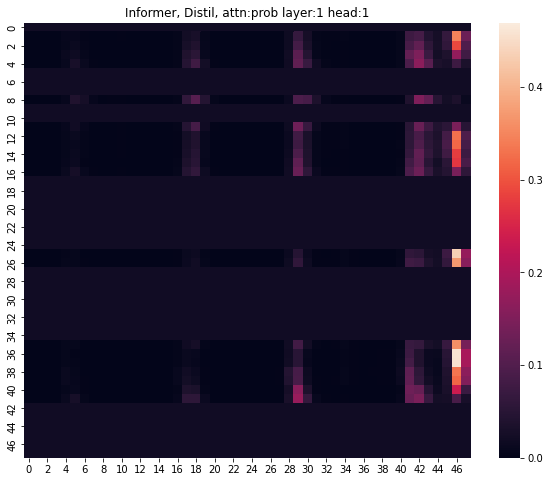

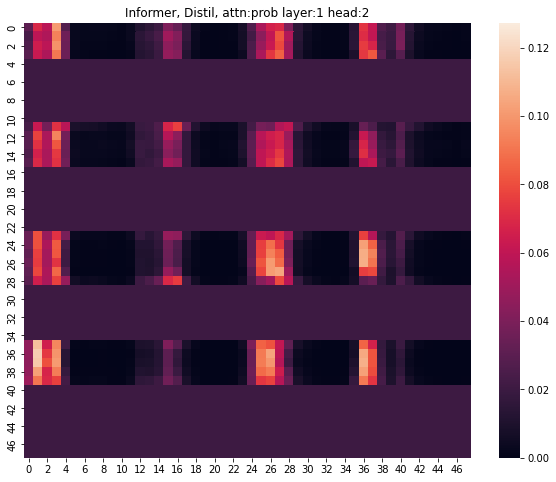

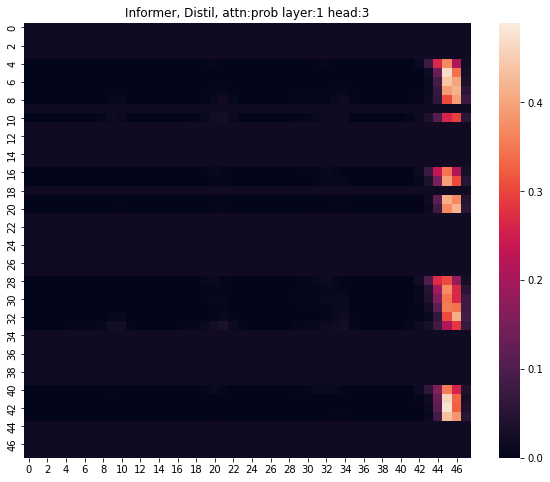

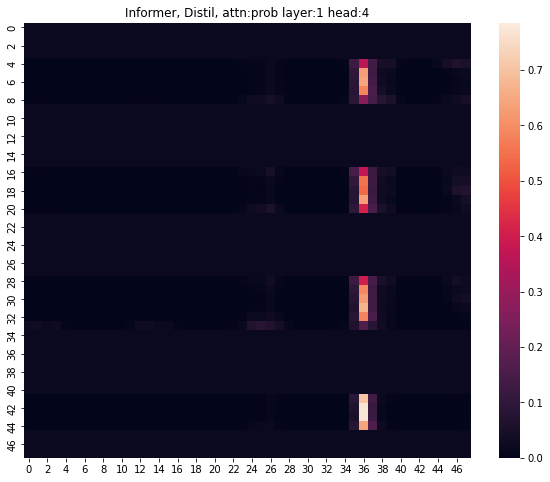

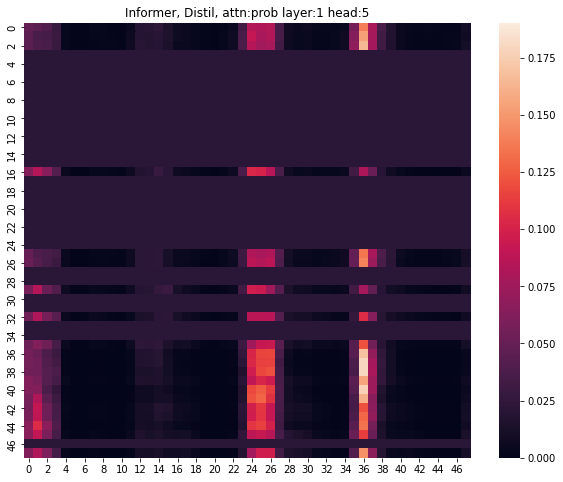

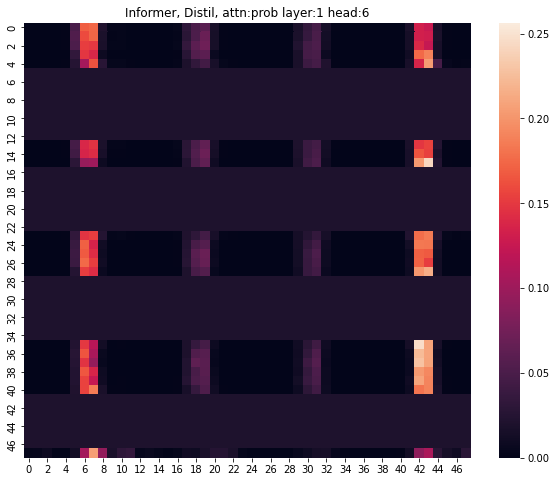

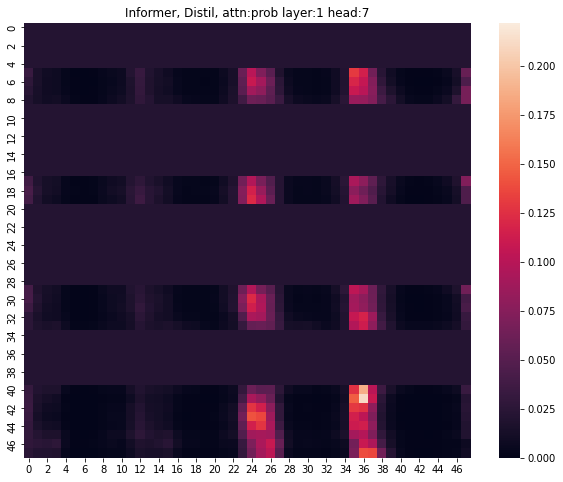

In [30]:
layer = 1
distil = 'Distil' if args.distil else 'NoDistil'
for h in range(0,8):
    plt.figure(figsize=[10,8])
    plt.title('Informer, {}, attn:{} layer:{} head:{}'.format(distil, args.attn, layer, h))
    A = attn[layer][0,h].detach().cpu().numpy()
    ax = sns.heatmap(A, vmin=0, vmax=A.max()+0.01)
    plt.show()

## Custom Data

Custom data (xxx.csv) has to include at least 2 features: `date`(format: `YYYY-MM-DD hh:mm:ss`) and `target feature`.


In [31]:
from data.data_loader import Dataset_Custom
from torch.utils.data import DataLoader
import pandas as pd
import os

In [32]:
# custom data: xxx.csv
# data features: ['date', ...(other features), target feature]

# we take ETTh2 as an example
args.root_path = './ETDataset/ETT-small/'
args.data_path = 'ETTh2.csv'

df = pd.read_csv(os.path.join(args.root_path, args.data_path))

In [33]:
df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2,2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
3,2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
4,2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500


In [34]:
'''
We set 'HULL' as target instead of 'OT'

The following frequencies are supported:
        Y   - yearly
            alias: A
        M   - monthly
        W   - weekly
        D   - daily
        B   - business days
        H   - hourly
        T   - minutely
            alias: min
        S   - secondly
'''

args.target = 'HULL'
args.freq = 'h'

Data = Dataset_Custom
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    target=args.target, # HULL here
    freq=args.freq # 'h': hourly, 't':minutely
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [35]:
batch_x,batch_y,batch_x_mark,batch_y_mark = data_set[0]